In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
import joblib

In [29]:
df = pd.read_csv('Data3/NoOfArrivals2.csv')

# preprocessing

In [30]:
missing_values = df.isna()
missing_counts = df.isna().sum()
total_missing = df.isna().sum().sum()
print(f"total missing : {total_missing}")
print(f"type : {df.dtypes}")

total missing : 0
type : Country                          object
Inflation rate(%)               float64
Arrivals                          int64
Year                              int64
GDP                             float64
Length of Stay(Days)            float64
Per Capita Spending($US/Day)    float64
Tourism Receipts(Mil. $US)      float64
Region                           object
Covid Outbreak                   object
dtype: object


In [31]:
# categorize
columns = df.columns.tolist()
for column in columns:
    if df[column].dtype != object:
        continue
    temp = df[column].unique()
    AnyToNum = {}
    NumToAny = {}
    for j, item in enumerate(temp, start=1):
        NumToAny[j] = item
        AnyToNum[item] = j
    def converter(item):
        return AnyToNum.get(item, np.nan)
    df[column] = df[column].apply(converter)
df

,Country,Inflation rate(%),Arrivals,Year,GDP,Length of Stay(Days),Per Capita Spending($US/Day),Tourism Receipts(Mil. $US),Region,Covid Outbreak
0,1,72.4,7549,2022,483.765,19.67,129.19,19.18,1,1
1,1,48.4,344,2021,455.172,57.20,81.92,1.87,1,1
2,1,42.0,12461,2020,633.889,15.66,79.83,20.63,1,1
3,1,53.5,28183,2019,617.386,14.07,146.13,57.94,1,2
4,1,34.3,43485,2018,602.868,15.08,137.39,90.09,1,2
...,...,...,...,...,...,...,...,...,...,...
419,54,2.8,1080609,2019,265.987,7.59,155.95,1279.07,5,2
420,54,3.5,1053723,2018,247.415,6.54,157.47,1085.16,5,2
421,54,3.5,985695,2017,229.845,5.78,153.36,873.74,5,2
422,54,2.7,863807,2016,214.750,5.98,147.07,759.72,5,2


# EDA

<Axes: >

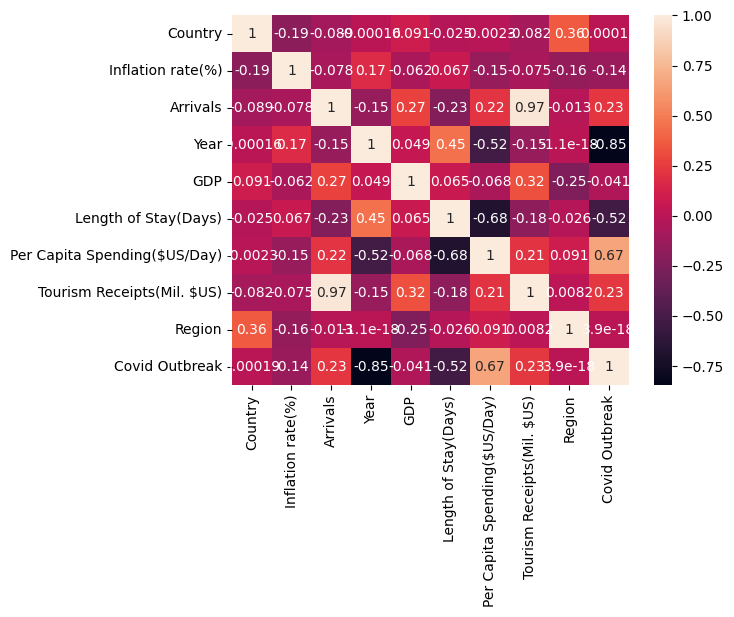

In [32]:
sns.heatmap(df.corr(), annot=True)

c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


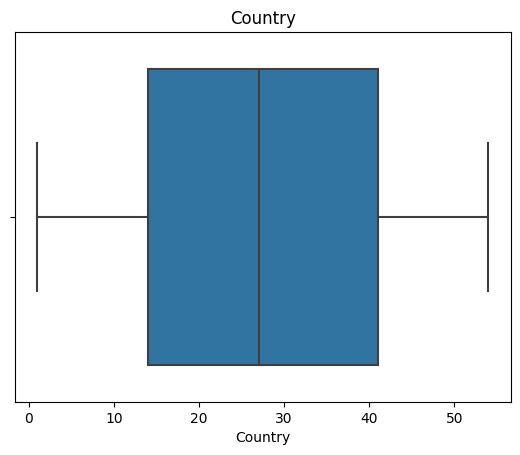

No of outliers : 0
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


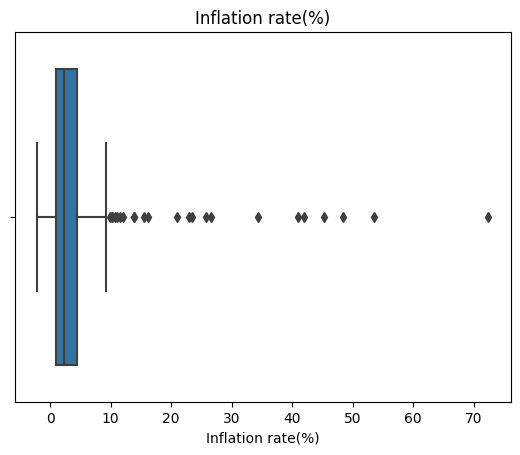

No of outliers : 23
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


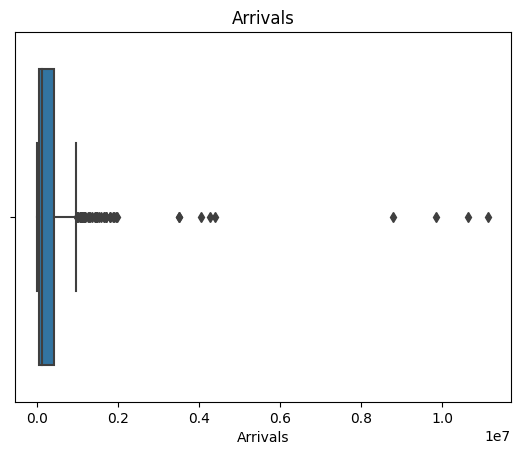

c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No of outliers : 47
-----------------------------------------------------------------------


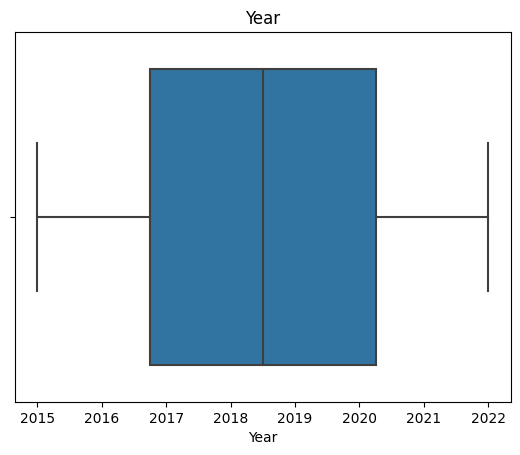

No of outliers : 0
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


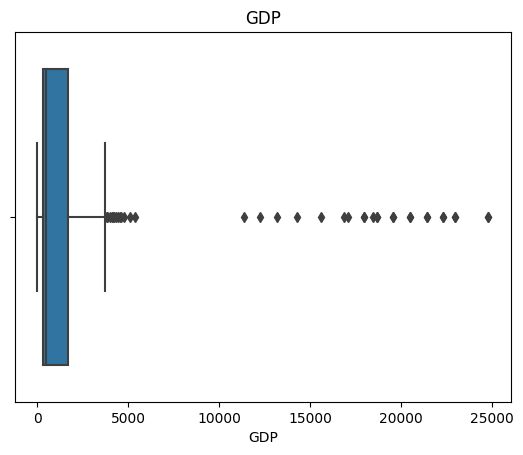

c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


No of outliers : 38
-----------------------------------------------------------------------


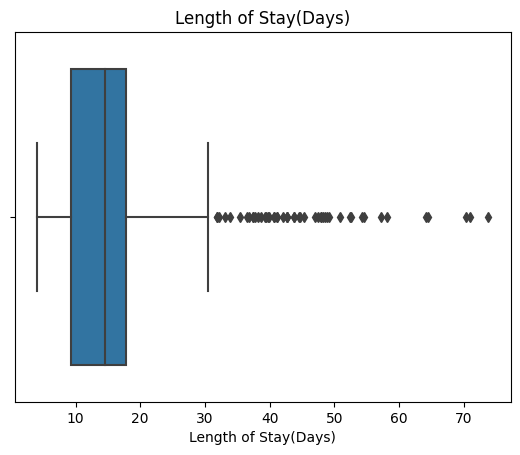

No of outliers : 50
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


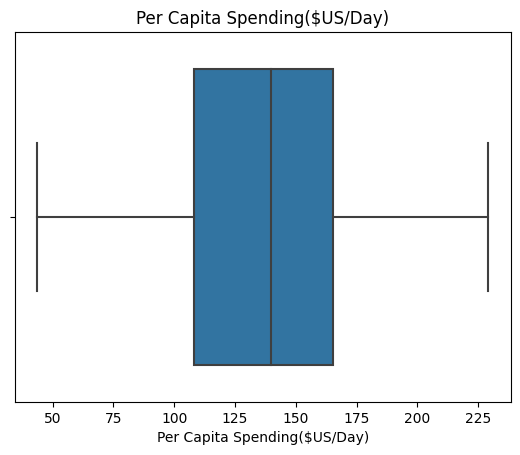

No of outliers : 0
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


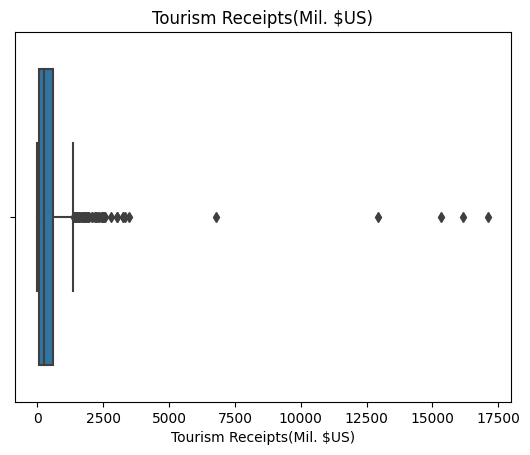

No of outliers : 53
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


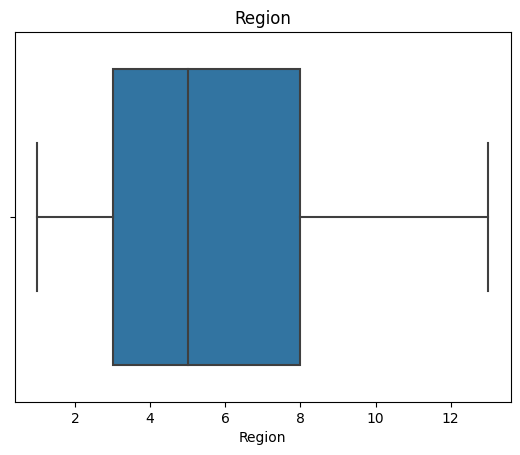

No of outliers : 0
-----------------------------------------------------------------------


c:\Users\Tairo Kageyama\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


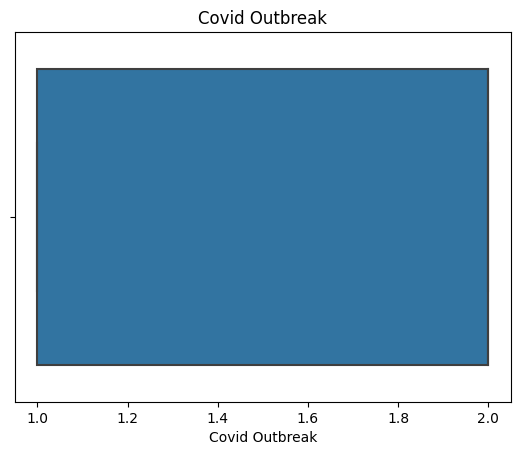

No of outliers : 0
-----------------------------------------------------------------------


In [41]:
for column in columns:
    sns.boxplot(df[column], showfliers=True)
    plt.title(f"{column}")
    plt.show()
    q1 = np.percentile(df[column], 25)
    q3 = np.percentile(df[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[column][(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"No of outliers : {len(outliers)}")
    print('-----------------------------------------------------------------------')